# Support Vector Regression Implementation

In [101]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [103]:
percent=(df.isnull().sum() / len(df['sex'])) * 100
percent

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [104]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [105]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [106]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [107]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [108]:
y=df['total_bill']
X=df.drop('total_bill',axis=1)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Feature Encoding (Label Encoding and OneHot Encoding)

1. Label Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [111]:
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [112]:
X_train.head(12)

,tip,sex,smoker,day,time,size
115,3.50,0,0,Sun,0,2
181,5.65,1,1,Sun,0,2
225,2.50,0,1,Fri,1,2
68,2.01,1,0,Sat,0,2
104,4.08,0,0,Sat,0,2
69,2.09,1,1,Sat,0,2
111,1.00,0,0,Sat,0,1
206,3.41,1,1,Sat,0,3
165,3.48,1,0,Sun,0,3
154,2.00,1,0,Sun,0,4


In [113]:
X_test['sex']=le1.fit_transform(X_test['sex'])
X_test['smoker']=le2.fit_transform(X_test['smoker'])
X_test['time']=le3.fit_transform(X_test['time'])

In [114]:
X_test.head()

,tip,sex,smoker,day,time,size
24,3.18,1,0,Sat,0,2
6,2.00,1,0,Sun,0,2
153,2.00,1,0,Sun,0,4
211,5.16,1,1,Sat,0,4
198,2.00,0,1,Thur,1,2


2. OneHot Encoding

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [116]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[3])],
                                  remainder='passthrough') #third index (day)

In [117]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [118]:
X_train

array([[ 0.  ,  0.  ,  1.  ,  0.  ,  3.5 ,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  5.65,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  2.5 ,  0.  ,  1.  ,  1.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  2.01,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  4.08,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  2.09,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  3.41,  1.  ,  1.  ,  0.  ,  3.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  3.48,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  2.  ,  1.  ,  0.  ,  0.  ,  4.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  ,  5.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  2.71,  1.  ,  0.  ,  1.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  3.  ,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  , 

In [119]:
## SVR--Supoort Vector Regression
from sklearn.svm import SVR
svr=SVR()

In [120]:
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

In [121]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.4974038696417854
4.457901629454618


## Hyperparameter Tuning using GridSearchCV

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1.0,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','sigmoid']}
grid=GridSearchCV(estimator=svr,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1.0, kernel=rbf;, score=-0.112 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1.0, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1.0, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1.0, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1.0, kernel=rbf;, score=-0.124 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=1.0, kernel=sigmoid;, score=-0.162 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=1.0, kernel=sigmoid;, score=-0.038 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=1.0, kernel=sigmoid;, score=-0.032 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=1.0, kernel=sigmoid;, score=-0.036 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=1.0, kernel=sigmoid;, score=-0.165 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.015 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [123]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [124]:
grid_prediction=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5695404568810171
4.221460483819818


### Continue tuning

In [125]:
param_grid={'C':[900,950,1000,1010,1020],
            'gamma':[0.009,0.01,0.011,0.012],
            'kernel':['rbf','linear']}
grid=GridSearchCV(estimator=svr,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ....C=900, gamma=0.009, kernel=rbf;, score=0.662 total time=   0.0s
[CV 2/5] END ....C=900, gamma=0.009, kernel=rbf;, score=0.708 total time=   0.0s
[CV 3/5] END ....C=900, gamma=0.009, kernel=rbf;, score=0.413 total time=   0.0s
[CV 4/5] END ....C=900, gamma=0.009, kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END ....C=900, gamma=0.009, kernel=rbf;, score=0.193 total time=   0.0s
[CV 1/5] END .C=900, gamma=0.009, kernel=linear;, score=0.667 total time=   0.1s
[CV 2/5] END .C=900, gamma=0.009, kernel=linear;, score=0.664 total time=   0.2s
[CV 3/5] END .C=900, gamma=0.009, kernel=linear;, score=0.361 total time=   0.1s
[CV 4/5] END .C=900, gamma=0.009, kernel=linear;, score=0.674 total time=   0.2s
[CV 5/5] END .C=900, gamma=0.009, kernel=linear;, score=0.199 total time=   0.1s
[CV 1/5] END .....C=900, gamma=0.01, kernel=rbf;, score=0.660 total time=   0.0s
[CV 2/5] END .....C=900, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [900, 950, 1000, 1010, 1020],
                         'gamma': [0.009, 0.01, 0.011, 0.012],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [126]:
grid.best_params_

{'C': 900, 'gamma': 0.009, 'kernel': 'rbf'}

In [127]:
grid_prediction=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.566922631921037
4.248462213426501


### Continue Testing

In [128]:
param_grid={'C':[800,850,895,900,905],
            'gamma':[0.0085,0.0088,0.009,0.0095],
            'kernel':['rbf','poly']}
grid=GridSearchCV(estimator=svr,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ...C=800, gamma=0.0085, kernel=rbf;, score=0.660 total time=   0.0s
[CV 2/5] END ...C=800, gamma=0.0085, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ...C=800, gamma=0.0085, kernel=rbf;, score=0.409 total time=   0.0s
[CV 4/5] END ...C=800, gamma=0.0085, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ...C=800, gamma=0.0085, kernel=rbf;, score=0.198 total time=   0.0s
[CV 1/5] END ..C=800, gamma=0.0085, kernel=poly;, score=0.427 total time=   0.0s
[CV 2/5] END ..C=800, gamma=0.0085, kernel=poly;, score=0.543 total time=   0.0s
[CV 3/5] END ..C=800, gamma=0.0085, kernel=poly;, score=0.203 total time=   0.0s
[CV 4/5] END ..C=800, gamma=0.0085, kernel=poly;, score=0.652 total time=   0.0s
[CV 5/5] END ..C=800, gamma=0.0085, kernel=poly;, score=0.214 total time=   0.0s
[CV 1/5] END ...C=800, gamma=0.0088, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ...C=800, gamma=0.0088, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [800, 850, 895, 900, 905],
                         'gamma': [0.0085, 0.0088, 0.009, 0.0095],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [129]:
grid.best_params_

{'C': 800, 'gamma': 0.0085, 'kernel': 'rbf'}

In [130]:
grid_prediction=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5692194045288331
4.258210847126227


### Continue Testing

In [131]:
param_grid={'C':[700,750,780,800],
            'gamma':[0.0050,0.0070,0.0080],
            'kernel':['rbf']}
grid=GridSearchCV(estimator=svr,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....C=700, gamma=0.005, kernel=rbf;, score=0.645 total time=   0.0s
[CV 2/5] END ....C=700, gamma=0.005, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ....C=700, gamma=0.005, kernel=rbf;, score=0.397 total time=   0.0s
[CV 4/5] END ....C=700, gamma=0.005, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ....C=700, gamma=0.005, kernel=rbf;, score=0.224 total time=   0.0s
[CV 1/5] END ....C=700, gamma=0.007, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/5] END ....C=700, gamma=0.007, kernel=rbf;, score=0.699 total time=   0.0s
[CV 3/5] END ....C=700, gamma=0.007, kernel=rbf;, score=0.394 total time=   0.0s
[CV 4/5] END ....C=700, gamma=0.007, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END ....C=700, gamma=0.007, kernel=rbf;, score=0.216 total time=   0.0s
[CV 1/5] END ....C=700, gamma=0.008, kernel=rbf;, score=0.654 total time=   0.0s
[CV 2/5] END ....C=700, gamma=0.008, kernel=rbf;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [700, 750, 780, 800],
                         'gamma': [0.005, 0.007, 0.008], 'kernel': ['rbf']},
             verbose=3)

In [132]:
grid.best_params_

{'C': 800, 'gamma': 0.005, 'kernel': 'rbf'}

In [133]:
grid_prediction=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5590322281705136
4.285385522171012


### The first tuning had the best r2_score
- {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [53]:
model=SVR(C=100,gamma=0.01,kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

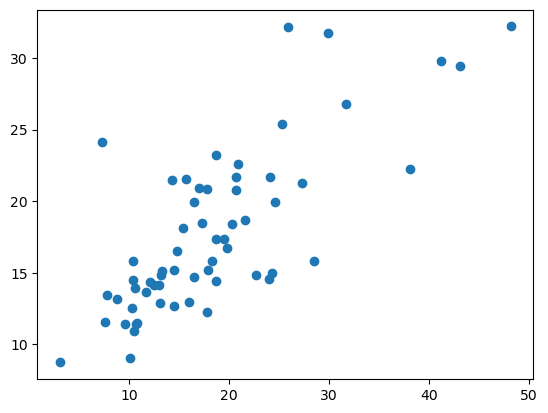

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("r2: ",score)

#r2 adjusted
r2_adjusted=1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("r2_adjusted: ",r2_adjusted)

mse:  34.21448856486322
mae:  4.260483973872266
rmse:  5.849315221875396
r2:  0.5630727637616455
r2_adjusted:  0.4958531889557448


In [60]:
X_test[0]

array([1.  , 0.  , 0.  , 3.18, 1.  , 0.  , 0.  , 2.  ])

In [74]:
print("Prediction: ",svr.predict([X_test[0]]))


Prediction:  [17.5561784]


In [75]:
print("Real Value: ",df['total_bill'][0])

Real Value:  16.99


# Saving The Model

In [76]:
import pickle
pickle.dump(svr,open('svr.pkl','wb'))